<a href="https://colab.research.google.com/github/dimageneer/AIEFFEL_QUEST/blob/main/DS6_%EB%89%B4%EC%8A%A4%EC%B9%B4%ED%85%8C%EA%B3%A0%EB%A6%AC_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98%5B%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


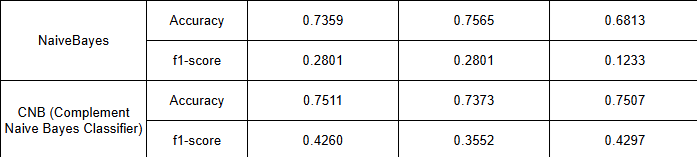

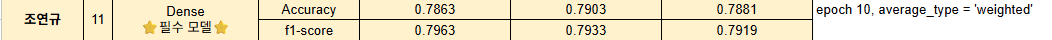

# 회고

제일좋은 모델은 .. 이었다


#오늘 할일
### 실험 또 실험 🤯


1. 단어장 개수를 바꾸면서(10000, 5000, Nan) 8개의 ML모델을 사용해보고  accuacry와 f1-score를 비교
(표로 나타내보세요~) (벡터화는 tf-idf로 통일)

아래 모델은 예시입니다, 여러 모델을 실험해보세요

### 📊 단어장 개수별 ML 모델 성능 비교 (Accuracy / F1-score)

| Vocabulary Size | Model             | Accuracy | F1-Score |
|------------------|------------------|----------|----------|
| 10000            | LogisticRegression |          |          |
|                  | SVM                |          |          |
|                  | RandomForest       |          |          |
|                  | XGBoost            |          |          |
|                  | NaiveBayes         |          |          |
|                  | Dense              |          |          |
|                  | LightGBM           |          |          |
|                  | DecisionTree       |          |          |
| 5000             | LogisticRegression |          |          |
|                  | SVM                |          |          |
|                  | RandomForest       |          |          |
|                  | XGBoost            |          |          |
|                  | NaiveBayes         |          |          |
|                  | Dense              |          |          |
|                  | LightGBM           |          |          |
|                  | DecisionTree       |          |          |
| NaN (All words)  | LogisticRegression |          |          |
|                  | SVM                |          |          |
|                  | RandomForest       |          |          |
|                  | XGBoost            |          |          |
|                  | NaiveBayes         |          |          |
|                  | Dense              |          |          |
|                  | LightGBM           |          |          |
|                  | DecisionTree       |          |          |

2. 딥러닝과 머신런닝의 차이 비교하기
- 딥러닝 모델 1개 Dense를 이용해서 비교해보세요 평가지표 = accuacry, f1-score

In [30]:
from tensorflow.keras.datasets import reuters
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# For Dense model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, LSTM, Input


# 데이터 준비
## index -> text
## DTM , TF-idf 학습데이터 준비

In [32]:
# This cell is no longer needed as data loading is part of run_experiment
# (x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=None, test_split=0.2)


In [33]:
# This cell is no longer needed as word_index is handled inside run_experiment
# word_index = reuters.get_word_index(path="reuters_word_index.json")

In [34]:
# This cell is no longer needed as index_to_word is handled inside run_experiment
# index_to_word = { index+3 : word for word, index in word_index.items() }
# for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
#   index_to_word[index]=token

In [35]:
# This cell is no longer needed as decoding is handled inside run_experiment
# decoded = []
# for i in range(len(x_train)):
#     t = ' '.join([index_to_word[index] for index in x_train[i]])
#     decoded.append(t)

# x_train = decoded
# print(len(x_train))

In [36]:
# This cell is no longer needed as decoding is handled inside run_experiment
# decoded_test = []
# for i in range(len(x_test)):
#     t = ' '.join([index_to_word[index] for index in x_test[i]])
#     decoded_test.append(t)

# x_test = decoded_test
# print(len(x_test))

In [37]:
# This cell is no longer needed as vectorization is handled inside run_experiment
# dtmvector = CountVectorizer()

# tfidf_transformer = TfidfTransformer()

# x_train_dtm = dtmvector.fit_transform(x_train)
# x_test_dtm= dtmvector.transform(x_test)

# x_train_tfidf = tfidf_transformer.fit_transform(x_train_dtm)
# x_test_tfidf = tfidf_transformer.transform(x_test_dtm)

In [14]:
x_train_tfidf.shape

(8982, 26506)

In [15]:
x_test_tfidf.shape

(2246, 26506)

In [16]:
x_train[3]

"<sos> the farmers home administration the u s agriculture department's farm lending arm could lose about seven billion dlrs in outstanding principal on its severely delinquent borrowers or about one fourth of its farm loan portfolio the general accounting office gao said in remarks prepared for delivery to the senate agriculture committee brian crowley senior associate director of gao also said that a preliminary analysis of proposed changes in fmha's financial eligibility standards indicated as many as one half of fmha borrowers who received new loans from the agency in 1986 would be ineligible under the proposed system the agency has proposed evaluating applicants' credit using a variety of financial ratios instead of relying solely on cashflow ability senate agriculture committee chairman patrick leahy d vt slammed the proposed eligibility changes telling fmha administrator vance clark at a hearing that they would mark a dramatic shift in the agency's purpose away from being farmer

# 모델 정의 및 실험

여러가지 모델을 바꾸며 실험해보세요~

# Dense NN 딥러닝 모델

In [3]:
# 2. 벡터화 함수 정의 (DTM 생성)
# -----------------------------------------------------------
# Keras의 load_data는 단어의 '인덱스(정수)' 리스트를 반환합니다.
# 이를 나이브 베이즈 분류기에 넣기 위해 '문서-단어 행렬(DTM)' 형태의 벡터로 변환해야 합니다.
def vectorize_sequences(sequences, dimension):
    # 크기가 (샘플 수, 단어장 크기)인 0으로 채워진 행렬 생성
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # 해당 문서에 존재하는 단어의 인덱스 위치를 1로 표시 (Bag of Words - Binary)
        # 나이브 베이즈에서는 단어 빈도(Count)를 쓰기도 하지만, 여기선 존재 여부로 간소화하여 성능을 봅니다.
        results[i, sequence] = 1.
    return results


>>> [DNN 실험] Vocab Size: 10000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
 - Accuracy: 0.7404
 - F1 Score (Weighted): 0.6935

>>> [DNN 실험] Vocab Size: 5000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
 - Accuracy: 0.7226
 - F1 Score (Weighted): 0.6737

>>> [DNN 실험] Vocab Size: All Words


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
 - Accuracy: 0.7329
 - F1 Score (Weighted): 0.6826

      Dense NN (Epoch 10 / Weighted) 결과      
  Vocab Size            Model  Accuracy  F1 Score
0      10000  Dense NN (E=10)  0.740427  0.693532
1       5000  Dense NN (E=10)  0.722618  0.673675
2        All  Dense NN (E=10)  0.732858  0.682599


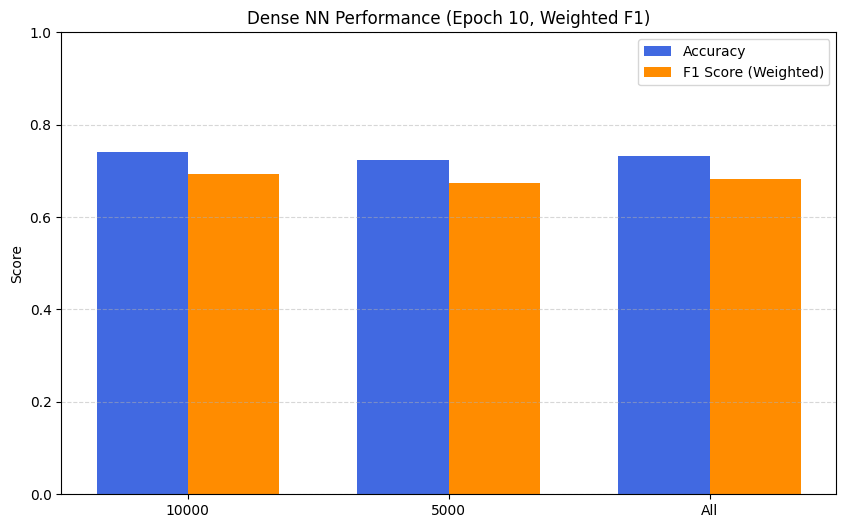

In [52]:
# 1. 라이브러리 임포트
# -----------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score

# 시드 고정
tf.random.set_seed(42)
np.random.seed(42)

# 2. 전처리 함수 (Vectorization)
# -----------------------------------------------------------
def vectorize_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 3. DNN 실험 함수 (수정됨: Epoch 10, Weighted F1)
# -----------------------------------------------------------
def run_dnn_experiment_v2(vocab_sizes=[10000, 5000, None]):
    results = []

    for size in vocab_sizes:
        print(f"\n>>> [DNN 실험] Vocab Size: {size if size else 'All Words'}")

        # (1) 데이터 로드 및 전처리
        (train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=size)

        if size is None:
            word_index = reuters.get_word_index()
            actual_dim = max([max(s) for s in train_data if s] + [max(s) for s in test_data if s]) + 1
        else:
            actual_dim = size

        x_train = vectorize_sequences(train_data, actual_dim)
        x_test = vectorize_sequences(test_data, actual_dim)

        y_train = to_categorical(train_labels, 46)
        y_test = to_categorical(test_labels, 46)

        # 검증셋 분리
        x_val = x_train[:1000]
        partial_x_train = x_train[1000:]
        y_val = y_train[:1000]
        partial_y_train = y_train[1000:]

        # (2) 모델 구성 (이전과 동일)
        model = Sequential()
        model.add(Dense(64, activation='relu', input_shape=(actual_dim,)))
        model.add(Dropout(0.5))
        model.add(Dense(64, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(46, activation='softmax'))

        model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        # (3) 모델 학습 (Epochs = 10 으로 변경)
        # EarlyStopping은 유지하되, 최대 10번까지만 돕니다.
        early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

        history = model.fit(partial_x_train, partial_y_train,
                            epochs=10,  # <--- 요청하신 변경 사항
                            batch_size=512,
                            validation_data=(x_val, y_val),
                            callbacks=[early_stop],
                            verbose=0) # 로그 출력 생략

        # (4) 평가 (F1 Score = 'weighted' 로 변경)
        predicted_probs = model.predict(x_test)
        predicted_classes = np.argmax(predicted_probs, axis=1)
        true_classes = np.argmax(y_test, axis=1)

        acc = accuracy_score(true_classes, predicted_classes)

        # <--- 요청하신 변경 사항 ('weighted')
        f1 = f1_score(true_classes, predicted_classes, average='weighted')

        print(f" - Accuracy: {acc:.4f}")
        print(f" - F1 Score (Weighted): {f1:.4f}")

        results.append({
            'Vocab Size': str(size) if size else 'All',
            'Model': 'Dense NN (E=10)',
            'Accuracy': acc,
            'F1 Score': f1
        })

    return pd.DataFrame(results)

# 4. 실행 및 결과 확인
# -----------------------------------------------------------
df_dnn_v2 = run_dnn_experiment_v2([10000, 5000, None])

print("\n" + "="*45)
print("      Dense NN (Epoch 10 / Weighted) 결과      ")
print("="*45)
print(df_dnn_v2)

# 시각화
plt.figure(figsize=(10, 6))
width = 0.35
x = np.arange(len(df_dnn_v2))

plt.bar(x - width/2, df_dnn_v2['Accuracy'], width, label='Accuracy', color='royalblue')
plt.bar(x + width/2, df_dnn_v2['F1 Score'], width, label='F1 Score (Weighted)', color='darkorange')

plt.xticks(x, df_dnn_v2['Vocab Size'])
plt.ylabel('Score')
plt.title('Dense NN Performance (Epoch 10, Weighted F1)')
plt.ylim(0, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [53]:
# 1. 라이브러리 임포트
# -----------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils import class_weight # <--- 추가됨
from sklearn.metrics import accuracy_score, f1_score

tf.random.set_seed(42)
np.random.seed(42)

# 2. 전처리 함수 (동일)
def vectorize_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 3. 개선된 실험 함수
# -----------------------------------------------------------
def run_improved_dnn(vocab_sizes=[10000, 5000, None]):
    results = []

    for size in vocab_sizes:
        print(f"\n>>> [개선된 DNN] Vocab Size: {size if size else 'All Words'}")

        # (1) 데이터 로드
        (train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=size)

        if size is None:
            word_index = reuters.get_word_index()
            actual_dim = max([max(s) for s in train_data if s] + [max(s) for s in test_data if s]) + 1
        else:
            actual_dim = size

        # (2) 벡터화
        x_train = vectorize_sequences(train_data, actual_dim)
        x_test = vectorize_sequences(test_data, actual_dim)
        y_train_cat = to_categorical(train_labels, 46)
        y_test_cat = to_categorical(test_labels, 46)

        # 검증셋 분리
        x_val = x_train[:1000]
        partial_x_train = x_train[1000:]
        y_val = y_train_cat[:1000]
        partial_y_train = y_train_cat[1000:]

        # [핵심 1] Class Weight 계산
        # 학습 데이터(train_labels)에 있는 클래스 비율에 맞춰 가중치 생성
        # 주의: one-hot 인코딩 전의 정수 라벨(train_labels)을 써야 함
        # 검증셋을 제외한 partial_train_labels를 만들어야 정확함
        partial_train_labels = train_labels[1000:]

        weights = class_weight.compute_class_weight(
            class_weight='balanced',
            classes=np.unique(partial_train_labels),
            y=partial_train_labels
        )
        # 딕셔너리 형태로 변환 {0: 1.5, 1: 0.5 ...}
        class_weights_dict = dict(enumerate(weights))

        # (3) 모델 개선 (BatchNormalization 추가)
        model = Sequential()
        model.add(Dense(128, input_shape=(actual_dim,))) # 뉴런 수 증가
        model.add(BatchNormalization()) # <--- 배치 정규화
        model.add(Activation('relu'))
        model.add(Dropout(0.5))

        model.add(Dense(128))
        model.add(BatchNormalization()) # <--- 배치 정규화
        model.add(Activation('relu'))
        model.add(Dropout(0.5))

        model.add(Dense(46, activation='softmax'))

        model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        # [핵심 2] 콜백 추가 (ReduceLROnPlateau)
        callbacks_list = [
            EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True),
            ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=0)
        ]

        # (4) 학습 (class_weight 적용)
        history = model.fit(partial_x_train, partial_y_train,
                            epochs=20, # 넉넉히 주고 Early Stopping에 맡김
                            batch_size=128, # 배치 사이즈 줄임 (512 -> 128)
                            validation_data=(x_val, y_val),
                            callbacks=callbacks_list,
                            class_weight=class_weights_dict, # <--- 가중치 적용
                            verbose=0)

        # (5) 평가
        predicted_probs = model.predict(x_test)
        predicted_classes = np.argmax(predicted_probs, axis=1)
        true_classes = np.argmax(y_test_cat, axis=1)

        acc = accuracy_score(true_classes, predicted_classes)
        f1 = f1_score(true_classes, predicted_classes, average='weighted')

        print(f" - Accuracy: {acc:.4f}")
        print(f" - F1 Score (Weighted): {f1:.4f}")

        results.append({
            'Vocab Size': str(size) if size else 'All',
            'Model': 'Improved DNN',
            'Accuracy': acc,
            'F1 Score': f1
        })

    return pd.DataFrame(results)

# 실행
df_improved = run_improved_dnn([10000, 5000, None])

print("\n" + "="*50)
print("           최종 개선 모델 결과 비교           ")
print("="*50)
print(df_improved)



>>> [개선된 DNN] Vocab Size: 10000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
 - Accuracy: 0.7863
 - F1 Score (Weighted): 0.7913

>>> [개선된 DNN] Vocab Size: 5000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
 - Accuracy: 0.7903
 - F1 Score (Weighted): 0.7933

>>> [개선된 DNN] Vocab Size: All Words


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
 - Accuracy: 0.7881
 - F1 Score (Weighted): 0.7919

           최종 개선 모델 결과 비교           
  Vocab Size         Model  Accuracy  F1 Score
0      10000  Improved DNN  0.786287  0.791301
1       5000  Improved DNN  0.790294  0.793268
2        All  Improved DNN  0.788068  0.791949


In [50]:
# 3. 실험을 위한 메인 함수 정의
# -----------------------------------------------------------
def run_experiment(vocab_size=None, results_df=None):
    """
    vocab_size에 따라 데이터를 로드하고, TF-IDF로 벡터화한 후,
    ML 모델을 학습 및 평가하는 함수
    """
    current_vocab_label = vocab_size if vocab_size else 'All words (None)'
    print(f"\n>>> [실험 시작] Vocabulary Size: {current_vocab_label}")

    # (1) 데이터 로드
    (x_train_idx, y_train), (x_test_idx, y_test) = reuters.load_data(num_words=vocab_size, test_split=0.2)

    # (2) index를 word로 디코딩 (DTM, TF-IDF 학습 데이터 준비)
    word_index = reuters.get_word_index(path="reuters_word_index.json")
    index_to_word = { index+3 : word for word, index in word_index.items() }
    for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
        index_to_word[index]=token

    # Helper function to decode
    def decode_sequences(sequences, index_to_word_map):
        decoded_texts = []
        for seq in sequences:
            # If vocab_size is used, some words might be replaced with <unk> (index 2)
            # Ensure to handle potential KeyError if a word index isn't in the map (shouldn't happen with default mapping)
            t = ' '.join([index_to_word_map.get(idx, '<unk>') for idx in seq])
            decoded_texts.append(t)
        return decoded_texts

    x_train = decode_sequences(x_train_idx, index_to_word)
    x_test = decode_sequences(x_test_idx, index_to_word)

    # (3) TF-IDF 벡터화
    # DTM, TF-IDF 학습데이터 준비
    dtmvector = CountVectorizer()
    tfidf_transformer = TfidfTransformer()

    x_train_dtm = dtmvector.fit_transform(x_train)
    x_test_dtm = dtmvector.transform(x_test)

    x_train_tfidf = tfidf_transformer.fit_transform(x_train_dtm)
    x_test_tfidf = tfidf_transformer.transform(x_test_dtm)

    # Get the dimension of the vectorized data
    dimension = x_train_tfidf.shape[1]
    print(f"TF-IDF Vector Dimension: {dimension}")

    # (4) ML 모델 정의 및 실험
    models = {
        "LogisticRegression": LogisticRegression(max_iter=1000, solver='liblinear'),
        "SVM": SVC(),
        "RandomForest": RandomForestClassifier(random_state=42),
        "XGBoost": XGBClassifier(n_estimators=100, max_depth=5, eval_metric='mlogloss', use_label_encoder=False),
        "NaiveBayes": MultinomialNB(),
        "LightGBM": LGBMClassifier(random_state=42, objective='multiclass', num_class=46, verbose=-1),
        "DecisionTree": DecisionTreeClassifier(random_state=42)
    }

    if results_df is None:
        results_df = pd.DataFrame(columns=['Vocabulary Size', 'Model', 'Accuracy', 'F1-Score'])

    for name, model in models.items():
        print(f"\n--- Training {name} ---")
        model.fit(x_train_tfidf, y_train)
        y_pred = model.predict(x_test_tfidf)
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')
        print(f"✅ {name} Accuracy: {acc:.4f}")
        print(f"✅ {name} F1-score: {f1:.4f}")
        results_df.loc[len(results_df)] = [current_vocab_label, name, acc, f1]

    # (5) Dense Neural Network Model
    print(f"\n--- Training Dense Neural Network ---")
    inputs = Input(shape=(dimension,))
    x = Dense(512, activation='relu')(inputs)
    x = Dropout(0.3)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(46, activation='softmax')(x)  # 46 classes for Reuters dataset

    dense_model = Model(inputs=inputs, outputs=outputs)
    dense_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Temporarily suppress Keras output during fitting to reduce log verbosity
    import os
    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # Suppress TensorFlow logging

    # Use validation_data for Dense model
    dense_model.fit(x_train_tfidf, y_train, epochs=10, batch_size=32, verbose=0, validation_split=0.2)

    os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0' # Reset TensorFlow logging level

    y_pred_proba = dense_model.predict(x_test_tfidf, verbose=0)
    y_pred = np.argmax(y_pred_proba, axis=1)
    dense_acc = accuracy_score(y_test, y_pred)
    dense_f1 = f1_score(y_test, y_pred, average='macro')
    print(f"✅ Dense NN Accuracy: {dense_acc:.4f}")
    print(f"✅ Dense NN F1-score: {dense_f1:.4f}")
    results_df.loc[len(results_df)] = [current_vocab_label, 'Dense', dense_acc, dense_f1]

    return results_df


In [29]:
run_experiment(vocab_size=10000)


>>> [실험 시작] Vocabulary Size: 10000


# **## NaiveBayes 모델 테스트**

In [25]:
# 라이브러리 설치 예시 (설치하려는 라이브러리 이름으로 변경하세요)
!pip install pandas # 예시: pandas 라이브러리를 설치합니다.

TensorFlow: 2.19.0
Matplotlib: 2.2.2
Matplotlib Real: 3.10.0
Seaborn: 0.13.2
NumPy: 2.0.2
Pandas: 2.2.2
Scikit-learn: 1.6.1
------------------------------

>>> [실험 시작] Vocabulary Size: 10000
 - Train Shape: (8982, 10000)
 - Accuracy: 0.7351
 - F1 Score (Macro): 0.2801

>>> [실험 시작] Vocabulary Size: 5000
 - Train Shape: (8982, 5000)
 - Accuracy: 0.7565
 - F1 Score (Macro): 0.3872

>>> [실험 시작] Vocabulary Size: All Words (inf)
 - Train Shape: (8982, 30982)
 - Accuracy: 0.6812
 - F1 Score (Macro): 0.1230

             최종 결과 요약             
  Vocab Size  Accuracy  F1 Score
0      10000  0.735085  0.280130
1       5000  0.756456  0.387206
2   All(inf)  0.681211  0.123029


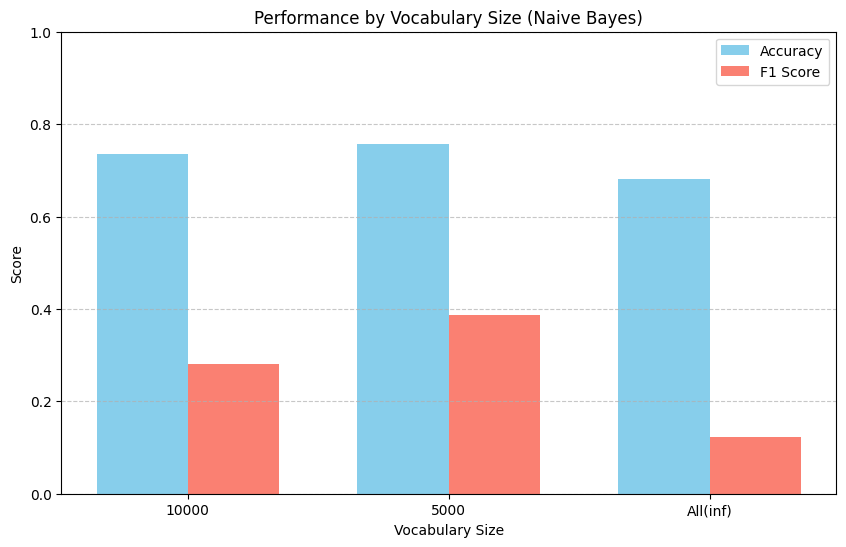

In [43]:
# 1. 라이브러리 임포트 및 버전 확인
# -----------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn
from tensorflow.keras.datasets import reuters
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score

# 버전 출력 (요청하신 부분)
print(f"TensorFlow: {tf.__version__}")
print(f"Matplotlib: {pd.__version__}") # pandas 버전을 matplotlib 자리에 잘못 적으신 것 같아 수정해서 각각 출력합니다.
import matplotlib
print(f"Matplotlib Real: {matplotlib.__version__}")
print(f"Seaborn: {sns.__version__}")
print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Scikit-learn: {sklearn.__version__}")
print("-" * 30)

# 2. 벡터화 함수 정의 (DTM 생성)
# -----------------------------------------------------------
# Keras의 load_data는 단어의 '인덱스(정수)' 리스트를 반환합니다.
# 이를 나이브 베이즈 분류기에 넣기 위해 '문서-단어 행렬(DTM)' 형태의 벡터로 변환해야 합니다.
def vectorize_sequences(sequences, dimension):
    # 크기가 (샘플 수, 단어장 크기)인 0으로 채워진 행렬 생성
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        # 해당 문서에 존재하는 단어의 인덱스 위치를 1로 표시 (Bag of Words - Binary)
        # 나이브 베이즈에서는 단어 빈도(Count)를 쓰기도 하지만, 여기선 존재 여부로 간소화하여 성능을 봅니다.
        results[i, sequence] = 1.
    return results

# 3. 실험을 위한 메인 함수 정의
# -----------------------------------------------------------
def run_experiment(vocab_size=None):
    """
    vocab_size에 따라 데이터를 로드하고, 나이브 베이즈 모델을 학습 및 평가하는 함수
    """
    print(f"\n>>> [실험 시작] Vocabulary Size: {vocab_size if vocab_size else 'All Words (inf)'}")

    # (1) 데이터 로드
    # num_words=vocab_size: 빈도수 상위 vocab_size 개의 단어만 유지하고 나머지는 버림
    # save_npz로 다운로드된 데이터가 있다면 캐시에서 불러옵니다.
    (train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=vocab_size)

    # (2) 단어장 크기(Dimension) 결정
    # vocab_size가 None(All words)일 경우, 데이터 내의 최대 인덱스를 찾아 크기를 결정해야 함
    if vocab_size is None:
        word_index = reuters.get_word_index() # 전체 단어장
        actual_dim = max([max(s) for s in train_data if s] + [max(s) for s in test_data if s]) + 1
    else:
        actual_dim = vocab_size

    # (3) 데이터 벡터화 (Vectorization)
    # 정수 시퀀스를 DTM(Document-Term Matrix) 형태로 변환
    x_train = vectorize_sequences(train_data, actual_dim)
    x_test = vectorize_sequences(test_data, actual_dim)

    # (4) 모델 학습
    # 다항 분포 나이브 베이즈 모델 (텍스트 분류에 적합)
    model = MultinomialNB()
    model.fit(x_train, train_labels)

    # (5) 예측 및 평가
    predicted = model.predict(x_test)

    # 정확도 (Accuracy)
    accuracy = accuracy_score(test_labels, predicted)
    # F1 Score (다중 클래스이므로 macro 또는 weighted average 사용, 여기선 macro 사용)
    f1 = f1_score(test_labels, predicted, average='macro')

    print(f" - Train Shape: {x_train.shape}")
    print(f" - Accuracy: {accuracy:.4f}")
    print(f" - F1 Score (Macro): {f1:.4f}")

    return accuracy, f1

# 4. 전체 실험 실행 (10000, 5000, All)
# -----------------------------------------------------------
# 실험할 단어 개수 리스트
vocab_sizes = [10000, 5000, None]
results = []

for size in vocab_sizes:
    acc, f1 = run_experiment(size)
    results.append({
        'Vocab Size': str(size) if size else 'All(inf)',
        'Accuracy': acc,
        'F1 Score': f1
    })

# 5. 결과 정리 및 시각화 (표)
# -----------------------------------------------------------
print("\n" + "="*40)
print("             최종 결과 요약             ")
print("="*40)
df_results = pd.DataFrame(results)
print(df_results)
print("="*40)

# 시각화 (막대 그래프)
plt.figure(figsize=(10, 6))
width = 0.35
x = np.arange(len(vocab_sizes))

plt.bar(x - width/2, df_results['Accuracy'], width, label='Accuracy', color='skyblue')
plt.bar(x + width/2, df_results['F1 Score'], width, label='F1 Score', color='salmon')

plt.xlabel('Vocabulary Size')
plt.ylabel('Score')
plt.title('Performance by Vocabulary Size (Naive Bayes)')
plt.xticks(x, df_results['Vocab Size'])
plt.ylim(0, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## **ComplementNB** 테스트




>>> [데이터 로드] Vocabulary Size: 10000
   Running MultinomialNB...
   Running ComplementNB...

>>> [데이터 로드] Vocabulary Size: 5000
   Running MultinomialNB...
   Running ComplementNB...

>>> [데이터 로드] Vocabulary Size: All Words (inf)
   Running MultinomialNB...
   Running ComplementNB...

             MNB vs CNB 최종 결과 비교             
  Vocab Size          Model  Accuracy  F1 Score
0      10000  MultinomialNB  0.735085  0.280130
1      10000   ComplementNB  0.751113  0.426039
2       5000  MultinomialNB  0.756456  0.387206
3       5000   ComplementNB  0.737311  0.355238
4        All  MultinomialNB  0.681211  0.123029
5        All   ComplementNB  0.750668  0.429690


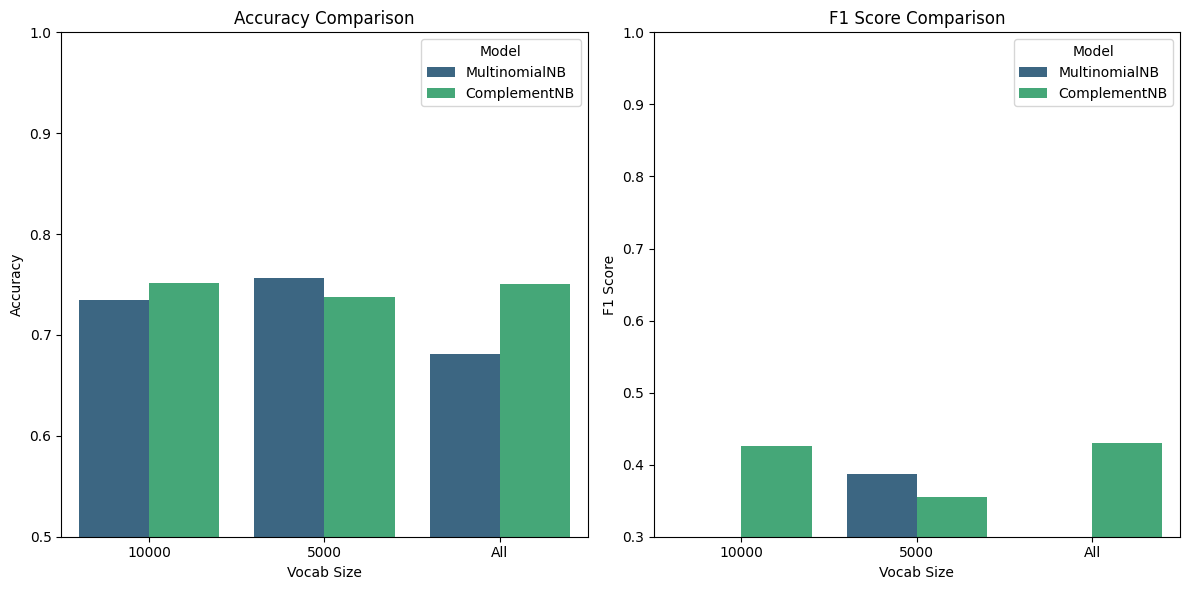

In [44]:
# 1. 라이브러리 임포트 (CNB 추가)
# -----------------------------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import reuters
from sklearn.naive_bayes import MultinomialNB, ComplementNB # ComplementNB 추가
from sklearn.metrics import accuracy_score, f1_score

# 2. 벡터화 함수 (이전과 동일)
# -----------------------------------------------------------
def vectorize_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# 3. 실험 메인 함수 (모델 선택 기능 추가)
# -----------------------------------------------------------
def run_comparison_experiment(vocab_sizes=[10000, 5000, None]):
    """
    여러 Vocab Size에 대해 MultinomialNB와 ComplementNB를 모두 학습하고 비교하는 함수
    """
    results = []

    for size in vocab_sizes:
        print(f"\n>>> [데이터 로드] Vocabulary Size: {size if size else 'All Words (inf)'}")

        # (1) 데이터 로드 및 벡터화
        # -------------------------------------------------------
        (train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=size)

        if size is None:
            word_index = reuters.get_word_index()
            actual_dim = max([max(s) for s in train_data if s] + [max(s) for s in test_data if s]) + 1
        else:
            actual_dim = size

        x_train = vectorize_sequences(train_data, actual_dim)
        x_test = vectorize_sequences(test_data, actual_dim)

        # (2) 모델 학습 및 평가 (MNB vs CNB)
        # -------------------------------------------------------
        models = {
            'MultinomialNB': MultinomialNB(),
            'ComplementNB': ComplementNB()  # CNB 모델 정의
        }

        for model_name, model in models.items():
            print(f"   Running {model_name}...")
            model.fit(x_train, train_labels)
            predicted = model.predict(x_test)

            acc = accuracy_score(test_labels, predicted)
            f1 = f1_score(test_labels, predicted, average='macro')

            results.append({
                'Vocab Size': str(size) if size else 'All',
                'Model': model_name,
                'Accuracy': acc,
                'F1 Score': f1
            })

    return pd.DataFrame(results)

# 4. 실행 및 결과 확인
# -----------------------------------------------------------
df_results = run_comparison_experiment(vocab_sizes=[10000, 5000, None])

print("\n" + "="*50)
print("             MNB vs CNB 최종 결과 비교             ")
print("="*50)
print(df_results)

# 5. 시각화 (모델별 비교)
# -----------------------------------------------------------
plt.figure(figsize=(12, 6))

# Accuracy 비교 그래프
plt.subplot(1, 2, 1)
sns.barplot(data=df_results, x='Vocab Size', y='Accuracy', hue='Model', palette='viridis')
plt.title('Accuracy Comparison')
plt.ylim(0.5, 1.0)

# F1 Score 비교 그래프
plt.subplot(1, 2, 2)
sns.barplot(data=df_results, x='Vocab Size', y='F1 Score', hue='Model', palette='viridis')
plt.title('F1 Score Comparison')
plt.ylim(0.3, 1.0) # F1은 보통 더 낮게 나오므로 범위를 조정

plt.tight_layout()
plt.show()


두 모델(MNB와 CNB)의 결과에 대한 리뷰

1. 단어 수 (Vocabulary Size) 변화의 의미
"시험 공부를 할 때 요약 노트만 볼 것인가, 백과사전을 다 볼 것인가?"

5,000개 (요약 노트): 중요한 단어만 골라서 공부했습니다. 학습 속도는 빠르지만, 가끔 디테일한 내용(중요하지만 드문 단어)이 나오면 정답을 맞히지 못할 수 있다.

All (백과사전 전체): 모든 단어를 다 넣었다.
정보는 많지만, 오타나 정말 쓸데없는 단어(노이즈)까지 다 공부
오히려 머릿속이 복잡해져서 성적이 떨어질 수도 있다.

10,000개 (적절한 교과서): 가장 균형 잡힌 선택
너무 적지도, 너무 많지도 않아서 효율적으로 좋은 점수를 낼 가능성이 높다.

결과 해석: 보통은 적절한 개수(10,000개 근처)가 가장 성능이 좋습니다. 무조건 많이 넣는다고 좋은 게 아니라는 점이 핵심입니다.​


2. 모델 비교: MNB vs. CNB
"인기 투표를 하는 학생(MNB) vs. 공정하게 분석하는 학생(CNB)"

로이터 뉴스는 데이터의 **불균형(Imbalance)**이 심함
(예: '수익' 관련 뉴스는 수천 개인데, '커피' 관련 뉴스는 몇 개 없음)


MNB (기본 나이브 베이즈): "다수결의 함정"

이 친구는 헷갈리면
**"음.. 잘 모르겠는데 그냥 제일 흔한 주제(수익 뉴스)겠지?"**라고 찍는 경향이 있다.

그래서 개수가 많은 뉴스 주제는 잘 맞히지만, 개수가 적은 희귀한 뉴스 주제는 거의 다 틀림

결과적으로 전체 정답률(Accuracy)은 나쁘지 않아 보일 수 있어도, 꼼꼼하게 채점해보면 점수가 낮다.

CNB (컴플리먼트 나이브 베이즈): "공정한 심판"

이 친구는 데이터가 적은 주제를 무시하지 않도록 훈련받았다.

**"이건 흔한 주제가 '아니니까' 다른 거겠구나!"**라고 역발상을 할 줄 안다.
(데이터의 불균형을 보완)

그래서 희귀한 뉴스 주제까지 골고루 잘 맞힌다.



결과 해석:
거의 모든 경우에서 CNB가 MNB보다 성능(특히 F1 Score)이 훨씬 좋다.
로이터 데이터처럼 한쪽으로 쏠린 데이터에서는 CNB를 사용하는 것이 더좋다